In [263]:
#http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
from pandas_datareader import data
import matplotlib.pyplot as plt   # Import matplotlib

import pandas as pd

In [264]:
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['close']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [265]:
tickers = ['AAPL', 'MSFT', 'SPY']

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2000-01-01'
end_date = '2016-12-31'

# 여기에서 panel은 3차원의 매트릭스.  1차원은 OHLC 2차원은 날짜 3차원은 ticker
panel_data = data.DataReader(tickers, data_source, start_date, end_date)# Getting just the adjusted closing prices. This will return a Pandas DataFrame

close = panel_data.ix['Close']

all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

close = close.reindex(all_weekdays)

close.head(10)

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,AAPL,MSFT,SPY
2000-01-03,3.997768,58.28125,145.437500
2000-01-04,3.660714,56.31250,139.750000
2000-01-05,3.714286,56.90625,140.000000
2000-01-06,3.392857,55.00000,137.750000
2000-01-07,3.553571,55.71875,145.750000
2000-01-10,3.491071,56.12500,146.250000
2000-01-11,3.312500,54.68750,144.500000
2000-01-12,3.113839,52.90625,143.062500
2000-01-13,3.455357,53.90625,145.000000
2000-01-14,3.587054,56.12500,146.968704


In [266]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 4277 (major_axis) x 3 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2016-12-30 00:00:00 to 2000-01-03 00:00:00
Minor_axis axis: AAPL to SPY

In [267]:
panel_data.isnull().sum()

,Adj Close,Close,High,Low,Open,Volume
AAPL,0,0,0,0,0,0
MSFT,0,0,0,0,0,0
SPY,0,0,0,0,0,0


In [268]:
# 수정종가 
adj_close = panel_data.ix['Adj Close']

In [269]:
# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
adj_close = adj_close.reindex(all_weekdays)
all_weekdays

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=4435, freq='B')

In [270]:
adj_close = adj_close.fillna(method='ffill')
adj_close

,AAPL,MSFT,SPY
2000-01-03,3.596616,38.903194,104.855759
2000-01-04,3.293384,37.589046,100.755241
2000-01-05,3.341579,37.985374,100.935471
2000-01-06,3.052405,36.712940,99.313301
2000-01-07,3.196992,37.192707,105.081024
2000-01-10,3.140763,37.463867,105.441551
2000-01-11,2.980111,36.504345,104.179825
2000-01-12,2.801384,35.315346,103.143448
2000-01-13,3.108633,35.982849,104.540314
2000-01-14,3.227114,37.463867,105.959679


In [271]:
all_weekdays

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=4435, freq='B')

In [272]:
help( adj_close.fillna)

Help on method fillna in module pandas.core.frame:

fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Fill NA/NaN values using the specified method
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame). (values not
        in the dict/Series/DataFrame will not be filled). This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use NEXT valid observation to fill gap
    axis : {0 or 'index', 1 or 'columns'}
    inplace : boolean, default False
        If True, fil

In [273]:
adj_close = adj_close.fillna(method='ffill')

In [274]:
adj_close

,AAPL,MSFT,SPY
2000-01-03,3.596616,38.903194,104.855759
2000-01-04,3.293384,37.589046,100.755241
2000-01-05,3.341579,37.985374,100.935471
2000-01-06,3.052405,36.712940,99.313301
2000-01-07,3.196992,37.192707,105.081024
2000-01-10,3.140763,37.463867,105.441551
2000-01-11,2.980111,36.504345,104.179825
2000-01-12,2.801384,35.315346,103.143448
2000-01-13,3.108633,35.982849,104.540314
2000-01-14,3.227114,37.463867,105.959679


In [275]:
adj_close.head(7)

,AAPL,MSFT,SPY
2000-01-03,3.596616,38.903194,104.855759
2000-01-04,3.293384,37.589046,100.755241
2000-01-05,3.341579,37.985374,100.935471
2000-01-06,3.052405,36.712940,99.313301
2000-01-07,3.196992,37.192707,105.081024
2000-01-10,3.140763,37.463867,105.441551
2000-01-11,2.980111,36.504345,104.179825


In [276]:
adj_close.describe()

,AAPL,MSFT,SPY
count,4435.000000,4435.000000,4435.000000
mean,35.191288,25.864070,117.409774
std,37.933006,10.338320,41.229286
min,0.843106,12.171559,57.161598
25%,3.215066,19.171926,87.919391
50%,17.490602,22.247644,104.237724
75%,64.533600,27.108754,128.246124
max,126.941574,62.543003,224.350555


In [277]:
#이동 평균선 구해보기
aapl = adj_close.ix[:,'AAPL']

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [278]:
aapl.head(3)

2000-01-03    3.596616
2000-01-04    3.293384
2000-01-05    3.341579
Freq: B, Name: AAPL, dtype: float64

In [279]:
short_rolling_aapl = aapl.rolling(window=20).mean()
long_rolling_aapl = aapl.rolling(window=100).mean()

In [280]:
short_rolling_aapl.head(40)

2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-26         NaN
2000-01-27         NaN
2000-01-28    3.315674
2000-01-31    3.302521
2000-02-01    3.298906
2000-02-02    3.290572
2000-02-03    3.303926
2000-02-04    3.317582
2000-02-07    3.343788
2000-02-08    3.379333
2000-02-09    3.420199
2000-02-10    3.447108
2000-02-11    3.460463
2000-02-14    3.485163
2000-02-15    3.509361
2000-02-16    3.521511
2000-02-17    3.523720
2000-02-18    3.523619
2000-02-21    3.531652
2000-02-22    3.534162
2000-02-23    3.543902
2000-02-24    3.552261
2000-02-25    3.566318
Freq: B, Name: AAPL, dtype: float64

In [281]:
# let me plot
fig = plt.figure()

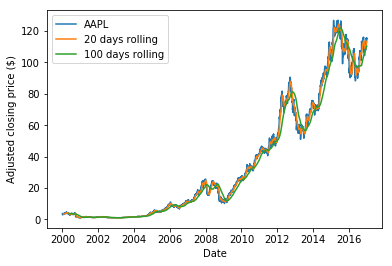

In [282]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(aapl.index, aapl, label='AAPL')
ax.plot(short_rolling_aapl.index, short_rolling_aapl, label='20 days rolling')
ax.plot(long_rolling_aapl.index, long_rolling_aapl, label='100 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [286]:
adj_close

,AAPL,MSFT,SPY
2000-01-03,3.596616,38.903194,104.855759
2000-01-04,3.293384,37.589046,100.755241
2000-01-05,3.341579,37.985374,100.935471
2000-01-06,3.052405,36.712940,99.313301
2000-01-07,3.196992,37.192707,105.081024
2000-01-10,3.140763,37.463867,105.441551
2000-01-11,2.980111,36.504345,104.179825
2000-01-12,2.801384,35.315346,103.143448
2000-01-13,3.108633,35.982849,104.540314
2000-01-14,3.227114,37.463867,105.959679


In [288]:
# Relative returns
returns = adj_close.pct_change(1)
returns.head()

,AAPL,MSFT,SPY
2000-01-03,NaN,NaN,NaN
2000-01-04,-0.084310,-0.033780,-0.039106
2000-01-05,0.014634,0.010544,0.001789
2000-01-06,-0.086538,-0.033498,-0.016071
2000-01-07,0.047368,0.013068,0.058076


In [290]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(adj_close).diff()
log_returns.head()

,AAPL,MSFT,SPY
2000-01-03,NaN,NaN,NaN
2000-01-04,-0.088078,-0.034364,-0.039891
2000-01-05,0.014528,0.010489,0.001787
2000-01-06,-0.090514,-0.034072,-0.016202
2000-01-07,0.046281,0.012983,0.056452


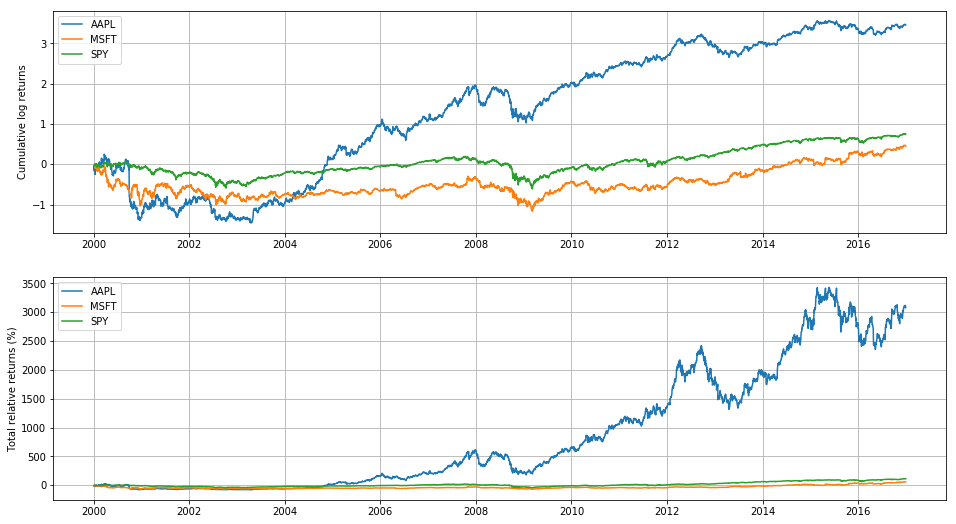

In [296]:
fig = plt.figure(figsize=[16,9])

ax = fig.add_subplot(2,1,1)

for c in log_returns:
    ax.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax.set_ylabel('Cumulative log returns')
ax.legend(loc='best')
ax.grid()

ax = fig.add_subplot(2,1,2)

for c in log_returns:
    ax.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax.set_ylabel('Total relative returns (%)')
ax.legend(loc='best')
ax.grid()

plt.show()